## Random Forest Classifier
The model predicts the severity of the landslide (or if there will even be one) within the next 2 days, based on weather data from the past 5 days.
A Random Forest model with 113 trees yielded an accuracy of 81.21% when trained on slope data and precipitation and wind data over a 5 day period.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
import pickle

In [24]:
df = pd.read_csv("dataset.csv")
len(df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


17808

In [25]:
df['severity'].value_counts()

medium          5594
small           2612
unknown          834
large            679
...              359
very_large       102
Medium            72
Unknown           19
Large             17
Small             10
catastrophic       4
landslide          2
Very_large         1
Very...large       1
Name: severity, dtype: int64

In [26]:
df = df.query("(landslide == 0) | (landslide == 1 & (severity == 'medium' | severity == 'small' | severity == 'large' | severity=='very_large'))")
df

,Unnamed: 0,id,date,lat,lon,country,fatalities,injuries,type,trigger,...,ARI7,ARI6,ARI5,ARI4,ARI3,ARI2,ARI1,ARI0,slope,osm
0,0,1069,9/4/16,46.726906,13.787332,Austria,0.0,0.0,landslide,dam_embankment_collapse,...,2.976590,3.654591,1.058343,0.509419,0.896284,0.480223,0.240812,2.624868,22.012,433
1,1,1855,3/23/17,49.726406,-116.911834,Canada,0.0,0.0,mudslide,rain,...,2.492622,0.792003,1.980438,0.630716,0.318662,0.915588,0.546437,0.257236,34.101,445
2,2,797,10/20/09,18.534700,-72.409700,Haiti,4.0,0.0,landslide,downpour,...,5.497363,5.638706,3.951952,1.973113,1.409695,2.643286,4.717002,3.625811,25.380,672
4,4,13089,5/1/14,39.290200,-76.665100,United_States,0.0,0.0,mudslide,rain,...,0.044098,1.149294,0.760023,0.251724,1.122024,1.115725,9.222064,2.666510,0.000,3909
5,5,9036,7/12/13,36.262900,-115.615800,United_States,0.0,0.0,debris_flow,rain,...,0.504706,0.251684,1.435697,0.394314,0.186833,0.106178,0.523179,0.286147,4.063,3930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17803,22245,17836,9/22/11,7.540900,-82.659100,NaN,NaN,NaN,NaN,NaN,...,4.493989,5.745197,3.058807,1.141890,2.618064,2.800256,1.154158,0.712405,0.000,6
17804,22246,15144,4/30/11,39.429500,34.088500,NaN,NaN,NaN,NaN,NaN,...,0.032862,3.579579,1.095954,0.447838,0.377586,1.312842,1.064443,1.170743,14.018,6
17805,22247,16613,11/15/19,4.743200,32.643400,NaN,NaN,NaN,NaN,NaN,...,0.289700,0.252853,0.630594,0.981392,1.151828,3.465756,1.940764,0.696374,29.115,6
17806,22248,19961,4/2/19,39.405500,-105.692100,NaN,NaN,NaN,NaN,NaN,...,0.638350,0.382398,0.648808,0.698512,2.685568,3.400111,1.788508,2.865115,3.254,5


In [27]:
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
print(len(df))

16489


In [28]:
df['severity'].value_counts()

medium        5594
small         2612
large          679
very_large     102
Name: severity, dtype: int64

In [29]:
X = df.copy()
y = []
types = set()
for idx, row in X.iterrows():
    if row.landslide == 0:
        y.append(0)
    elif row.severity == 'small':
        y.append(1)
    elif row.severity == 'medium':
        y.append(2)
    else:
        y.append(3)
    types.add(y[-1])
print(types)
columns=[]
for i in range(9, 4, -1):
    columns.append('humidity' + str(i))
    columns.append('ARI' + str(i))
columns.append('slope')
columns.append('forest2')
columns.append('osm')
X = X[columns]
X

{0, 1, 2, 3}


,humidity9,ARI9,humidity8,ARI8,humidity7,ARI7,humidity6,ARI6,humidity5,ARI5,slope,forest2,osm
0,89,0.731580,82,0.697771,79,0.502595,84,0.312172,60,0.129114,29.735,1,14482
1,100,6.755535,100,2.664108,100,2.836340,100,11.152881,100,19.430264,35.705,1,22976
2,80,0.280277,62,0.472441,57,1.015872,71,0.418554,60,0.362261,0.848,1,5782
3,92,0.165366,87,0.383304,95,0.101516,73,0.047662,77,0.027800,0.928,1,3279
4,98,7.351560,98,6.656665,98,4.885699,98,6.919885,98,5.876975,29.819,1,6100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16484,48,0.852793,54,1.126290,39,0.386110,65,0.605589,55,0.216564,6.747,0,636
16485,90,2.252213,89,0.774511,86,0.362260,86,0.280328,86,0.284432,26.341,1,7812
16486,96,0.239605,91,0.096078,97,0.652945,95,0.183180,94,0.074625,0.000,0,941
16487,87,0.004134,84,0.002646,85,0.001837,90,0.001350,90,0.000000,0.000,0,46


## Scaling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Prediction

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
pred = model.predict(X_test)
print("ACCURACY:", accuracy_score(pred, y_test))

ACCURACY: 0.7158884172225591


In [33]:
best = 1
highest = 0

for i in range(85, 150, 2):
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    score = round(accuracy_score(pred, y_test)*10000)/100
    print("n_estimators =", i, "  ACCURACY:", score)
    if score > highest:
        highest = score
        best = i
print("# of trees:", best, highest)

n_estimators = 85   ACCURACY: 70.35
n_estimators = 87   ACCURACY: 71.29
n_estimators = 89   ACCURACY: 71.19
n_estimators = 91   ACCURACY: 71.74
n_estimators = 93   ACCURACY: 71.53
n_estimators = 95   ACCURACY: 71.62
n_estimators = 97   ACCURACY: 70.92
n_estimators = 99   ACCURACY: 71.44
n_estimators = 101   ACCURACY: 71.26
n_estimators = 103   ACCURACY: 71.32
n_estimators = 105   ACCURACY: 71.41
n_estimators = 107   ACCURACY: 70.89
n_estimators = 109   ACCURACY: 71.59
n_estimators = 111   ACCURACY: 71.22
n_estimators = 113   ACCURACY: 71.41
n_estimators = 115   ACCURACY: 71.07
n_estimators = 117   ACCURACY: 71.74
n_estimators = 119   ACCURACY: 71.65
n_estimators = 121   ACCURACY: 70.92
n_estimators = 123   ACCURACY: 71.35
n_estimators = 125   ACCURACY: 70.62
n_estimators = 127   ACCURACY: 71.74
n_estimators = 129   ACCURACY: 70.98
n_estimators = 131   ACCURACY: 71.44
n_estimators = 133   ACCURACY: 71.41
n_estimators = 135   ACCURACY: 72.07
n_estimators = 137   ACCURACY: 71.62
n_estimat

In [2]:
rf = RandomForestClassifier(n_estimators = best)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(pred, y_test))
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred)
array

NameError: name 'RandomForestClassifier' is not defined

In [3]:
array = [[1375,   22,  132,    0],
       [  82,  120,  282,    0],
       [ 158,  127,  848,    1],
       [  24,    7,  118,    2]]

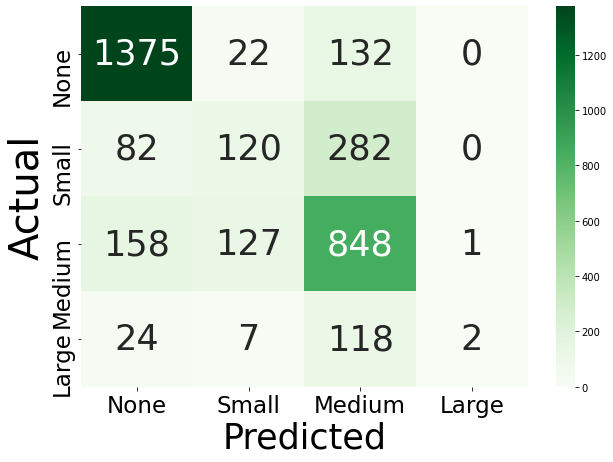

In [5]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
binary = False
if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size":35}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=23)
plt.xlabel('Predicted', fontsize = 35) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 
plt.savefig("RF Multi Matrix", bbox_inches="tight")

plt.show()